Understanding the pytorch

In [19]:
import torch

x = torch.tensor([5,7])

y = torch.tensor([7,5])

print(x*y)

tensor([35, 35])


In [20]:
x = torch.zeros([2,5])
print(x)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [21]:
x.shape

torch.Size([2, 5])

In [22]:
y =  torch.rand([2,5])
y

tensor([[0.3323, 0.1469, 0.9042, 0.4713, 0.9241],
        [0.7930, 0.8092, 0.6633, 0.0204, 0.3171]])

In [23]:
y.view([1,10])

tensor([[0.3323, 0.1469, 0.9042, 0.4713, 0.9241, 0.7930, 0.8092, 0.6633, 0.0204,
         0.3171]])

Importing the data 

In [24]:
import torch
import torchvision
from torchvision import transforms, datasets

In [25]:
train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:05<00:00, 1697421.88it/s]


Extracting MNIST\raw\train-images-idx3-ubyte.gz to MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 215863.89it/s]


Extracting MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 2089108.52it/s]


Extracting MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4544496.37it/s]

Extracting MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\raw



In [26]:
trainsets =  torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testsets =  torch.utils.data.DataLoader(train, batch_size=10, shuffle=False)

In [27]:
for data in trainsets:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [28]:
x, y = data[0][0], data[1][0]
print(y)

tensor(5)


In [29]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


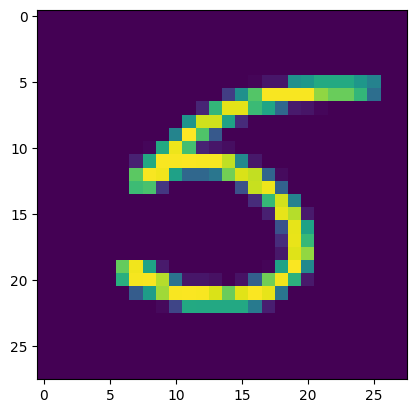

In [30]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28,28))

In [31]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainsets:
    Xs , ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [32]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


Building the neural network

In [33]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

trainsets =  torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)

testsets =  torch.utils.data.DataLoader(train, batch_size=10, shuffle=False)


In [34]:
import torch.nn as nn
import torch.nn.functional as F


In [35]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear( 28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
    


net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [36]:
X = torch.rand((28,28))
X = X.view(-1, 28*28)

In [37]:
ouput = net(X)
print(ouput)

tensor([[-2.3976, -2.2506, -2.1697, -2.3644, -2.3863, -2.2923, -2.3200, -2.2126,
         -2.3395, -2.3183]], grad_fn=<LogSoftmaxBackward0>)


Training Model


In [38]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainsets:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)


tensor(0.0410, grad_fn=<NllLossBackward0>)
tensor(0.0085, grad_fn=<NllLossBackward0>)
tensor(0.0023, grad_fn=<NllLossBackward0>)


In [39]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainsets:   
        X, y = data
        output = net(X.view(-1, 28*28))    
        for idx, i in enumerate(output):   
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1


print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.978


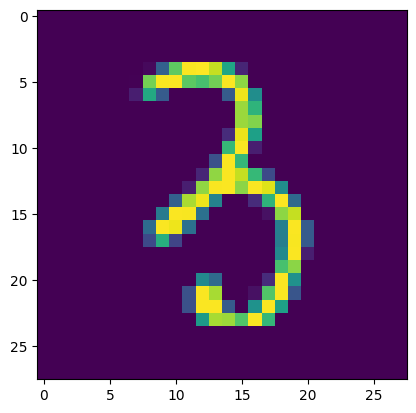

In [40]:
import matplotlib.pyplot as plt
plt.imshow(X[0].view(28,28))
plt.show()

In [41]:
print(torch.argmax(net(X[0].view(-1, 28*28))[0]))

tensor(3)


Convolutional Neural Networks

In [42]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = True  # Set to true to run once, then back to false unless you want to change something in your training data.

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img, dtype=np.float32), np.eye(2)[self.LABELS[label]]])

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass
                        #print(label, f, str(e))

        np.random.shuffle(self.training_data)
        images = np.array([i[0] for i in self.training_data])
        labels = np.array([i[1] for i in self.training_data])
        np.save("training_data_images.npy", images)
        np.save("training_data_labels.npy", labels)
        print('Cats:', self.catcount)
        print('Dogs:', self.dogcount)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()


PetImages/Cat


100%|██████████| 12501/12501 [01:39<00:00, 125.04it/s]


PetImages/Dog


100%|██████████| 12501/12501 [00:43<00:00, 285.33it/s]


Cats: 12476
Dogs: 12470


In [43]:
training_data = np.load("training_data_images.npy", allow_pickle=True)
print(len(training_data))


24946


In [44]:
print(training_data[1])

[[163. 148. 172. ...  77.  75.  72.]
 [210. 161. 153. ...  78.  76.  69.]
 [203. 181. 215. ...  75.  72.  69.]
 ...
 [145. 141. 185. ...  56.  69.  84.]
 [122. 108. 138. ...  57.  64.  76.]
 [108.  93. 111. ...  67.  63.  86.]]


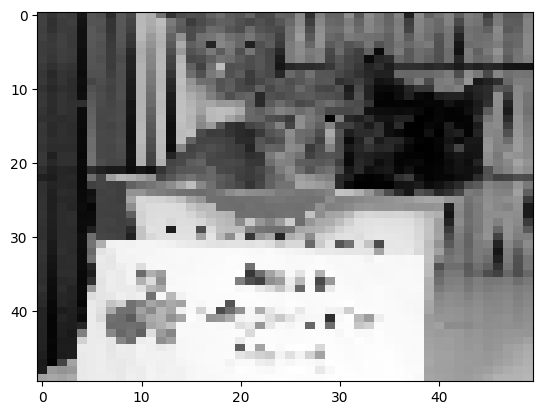

In [45]:
import matplotlib.pyplot as plt
plt.imshow(training_data[0], cmap="gray", aspect='auto')
plt.show()

In [46]:
training_data[1][1]

array([210., 161., 153., 222., 200., 204., 133., 134., 159., 181., 156.,
       148., 131., 130., 145., 131., 173., 156., 140., 124., 150., 110.,
       139., 117., 152., 115., 137., 139., 136., 169., 213., 206., 158.,
       140., 181., 175., 140., 127., 122., 122., 110., 110., 105., 102.,
        93.,  92.,  83.,  78.,  76.,  69.], dtype=float32)